# `UE20CS312`

## `DATA ANALYTICS PROJECT`

## `HOUSE RENT PREDICTION`


                             








#### To quote Peter Sondergaard, Global Research head at Gartner Inc, **"Information is the oil of the 21st century, and analytics is the combustion engine.”**

#### The course offered by the university, Data Analytics, requires us to do a mini-project at the end of the semester. For our mini-project, we've chosen ***House Rent Prediction*** as the title of our project.

### **Data Dictionary**

The dataset contains 11 attributes. They are BHK, Rent, Size, Floor, Area Type, Area Locality, City, Furnishing Status, Tenant Preferred, Bathroom, Point of Contact.

The dataset is a .csv file scraped off the internet.

**`BHK`**: Number of Bedrooms, Hall, Kitchen in the house

**`Rent`**: Rent listed for the House/Flat

**`Size`**: Size of the house in Sqft

**`Floor`**: Level of the house from the ground floor and the number of floors

**`Area Type`**: Size of the house calculated on Carpet Area or Super Area

**`City`**: City of the listing

**`Furnishing Status`**: Denotes whether the house is Furnished, Semi-Furnished or Unfurnished

**`Tenant Preferred`**: Type of tenant preferred by the Owner. For example: Vegetarians only, Family only and so on

**`Bathroom`**: Number of bathrooms in the house

**`Point of Contact`**: Person to be contacted incase the viewer is interested in the property









### **Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
import pylab

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score



/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
import tensorflow as tf

### **Loading the dataset**

In [3]:
df = pd.read_csv('House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


#### As we can see from the above cell, the dataset has 4746 rows and 11 columns along with a Date posted column. 
#### As the Posted On column has dates, we can convert it to datetime format for simpler analysis

In [5]:
df['Posted On'] = pd.to_datetime(df['Posted On'])
df.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


#### Key statistics about the data

In [6]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


#### Inferences:
#### Average rent is more than twice the Median rent indicating outliers
#### Average size of a house is 967.49 sqft 

#### Checking for null values

In [7]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

#### There are no null values in the dataset hence filling the dataset with mean values is not necessary.


## **Exploratory Data Analysis - EDA**


### Plotting the Rent values using different plots to see the distribution of the same
### 1. Histogram
### 2. Boxplot
### 3. Violin Plot
### 4. Probability Plot

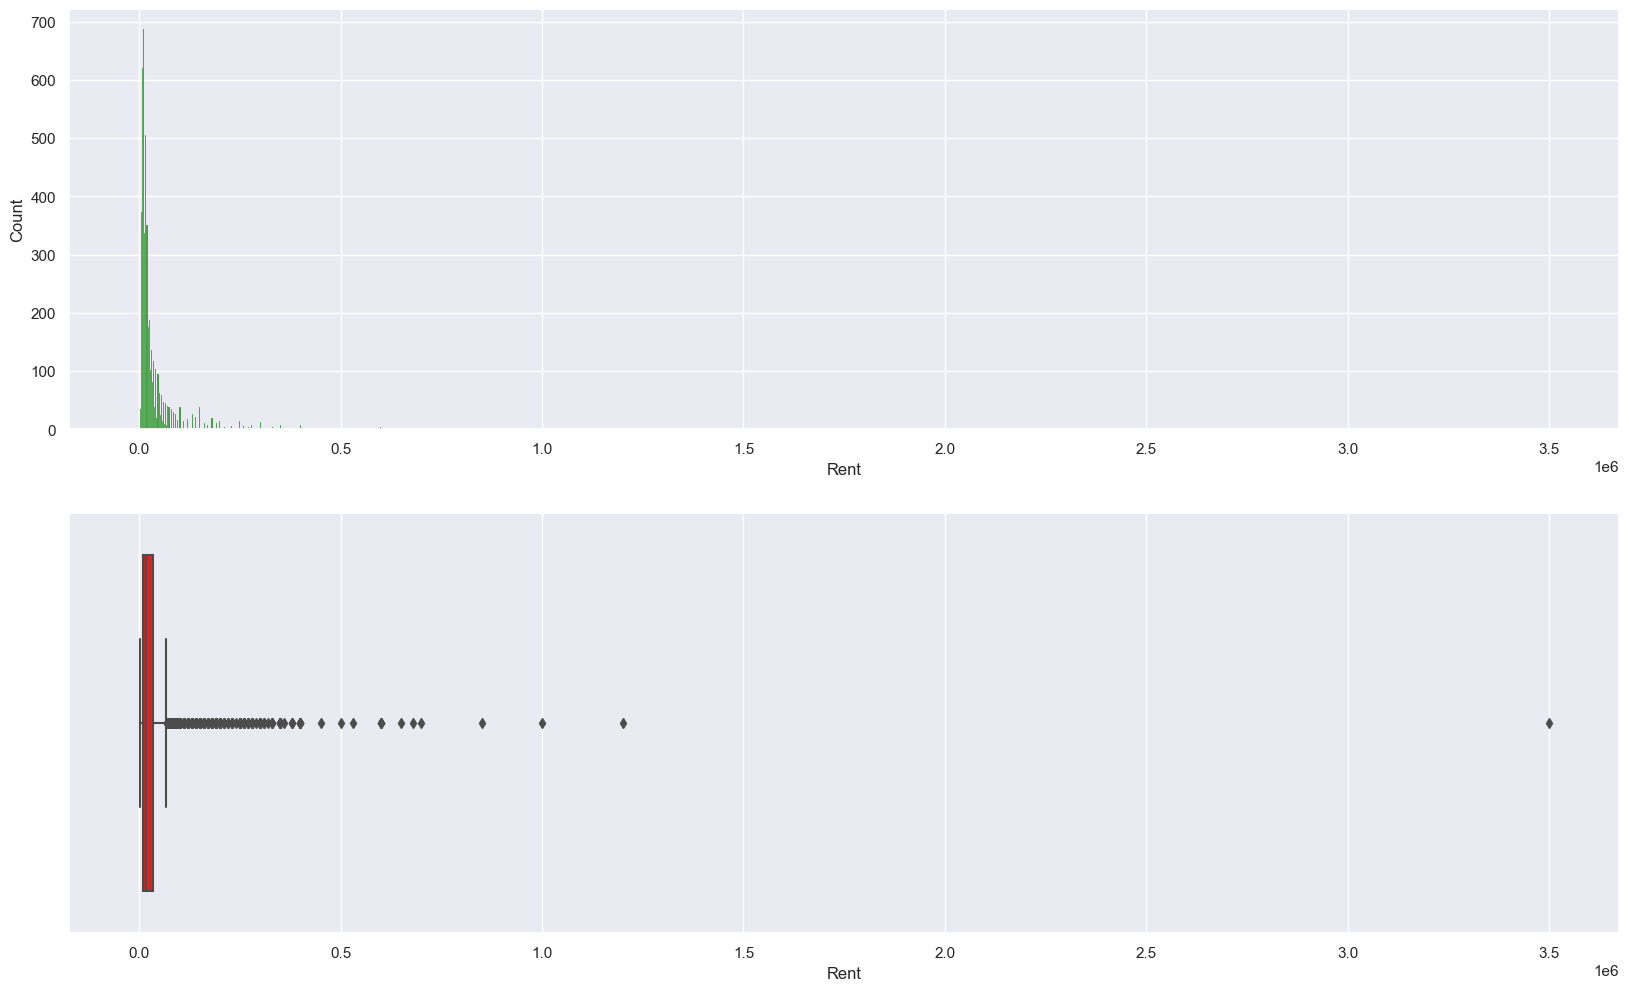

In [343]:
fig, ax = plt.subplots(2, 1, figsize=(20, 12))
ax1 = sns.histplot(x = df['Rent'], color='green', ax= ax[0])
ax2 = sns.boxplot(x = df['Rent'], ax= ax[1], color= 'red')
pylab.show()

### Let's plot the rent with a probability plot

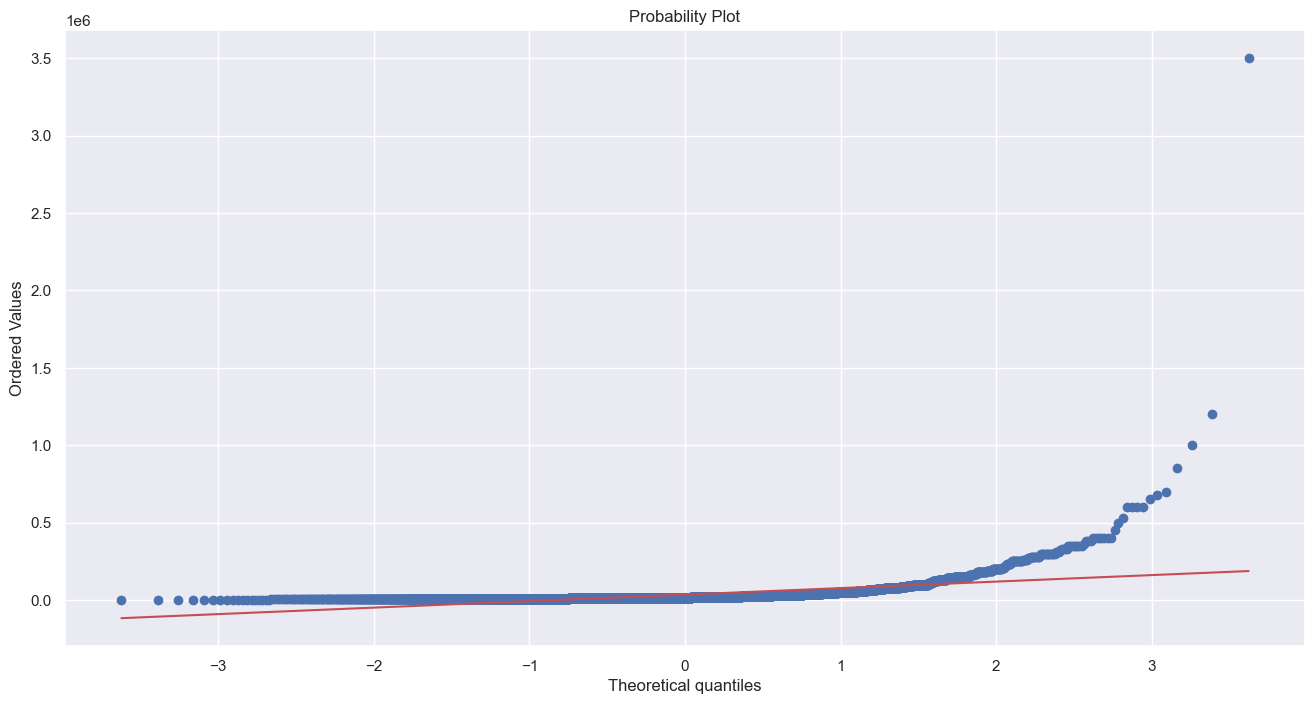

In [344]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax1 = probplot(df['Rent'], plot=pylab)
pylab.show()

In [8]:
max_rent = df['Rent'].max()
index_max_rent = df[df['Rent'] == max_rent].index
df = df.drop(index_max_rent)

bc_result = boxcox(df['Rent'])
boxcox_y = bc_result[0]
lam = bc_result[1]

#### From the above plots, we can see that there are outliers in the dataset and they have to be removed.
#### A boxcox transformation maybe the ideal choice for the removal of the outliers and bring it into a normal shape from the non-normal behaviour of the plots

In [9]:
df['Size'] = boxcox(df['Size'])[0]

#### Boxcox transformation has been applied, the histogram should have a normal distribution. Plotting the histogram and the boxplot

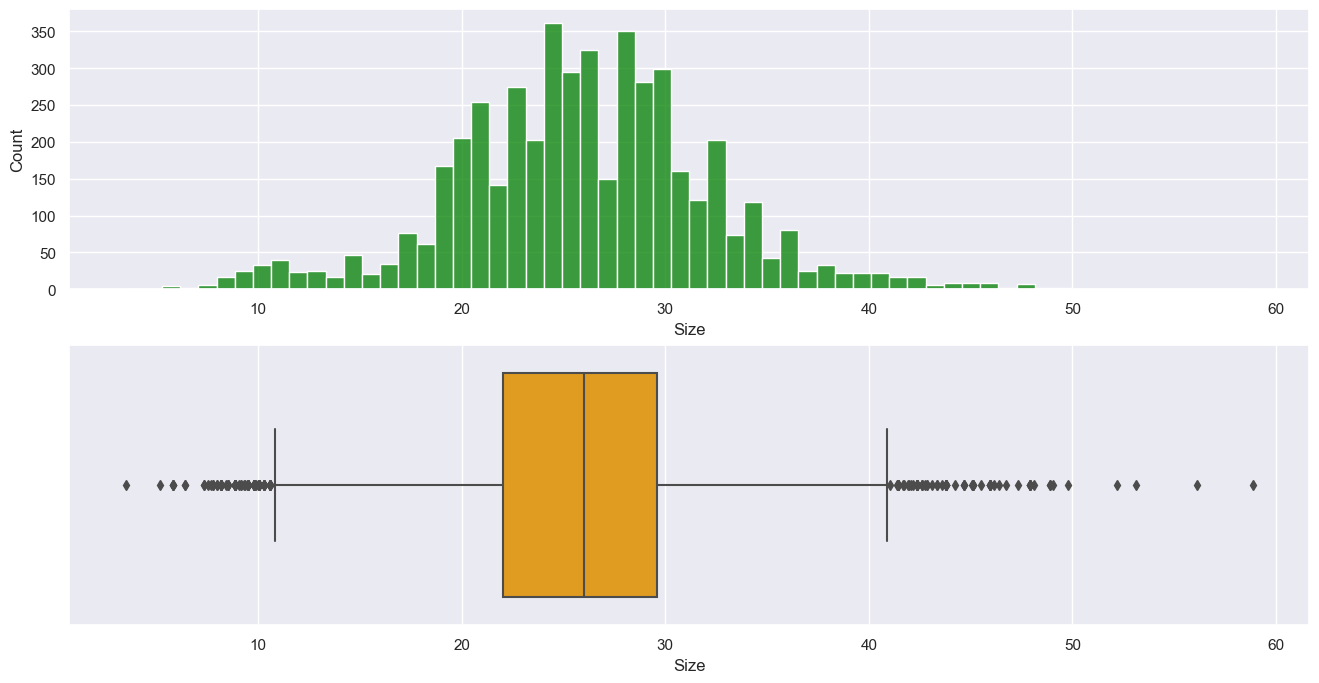

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(16,8))
ax1 = sns.histplot(x = df['Size'], color='green', ax= ax[0],legend=True)
ax2 = sns.boxplot(x = df['Size'], ax= ax[1], color= 'orange')
pylab.show()

#### Let's check the probability plot after applying the boxcox transformation


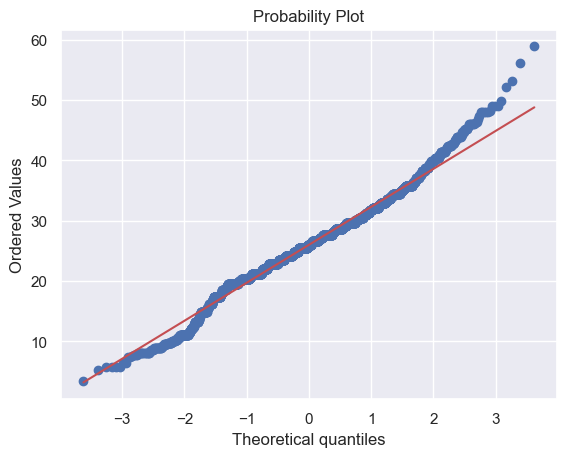

In [11]:
axp = probplot(df['Size'], plot=pylab)

#### As expected, the distribution became Normal once the boxcox transformation was applied.

#### Countplot can be used to infer the count of each attribute like tenant preferred, city etc

<AxesSubplot: xlabel='Tenant Preferred', ylabel='count'>

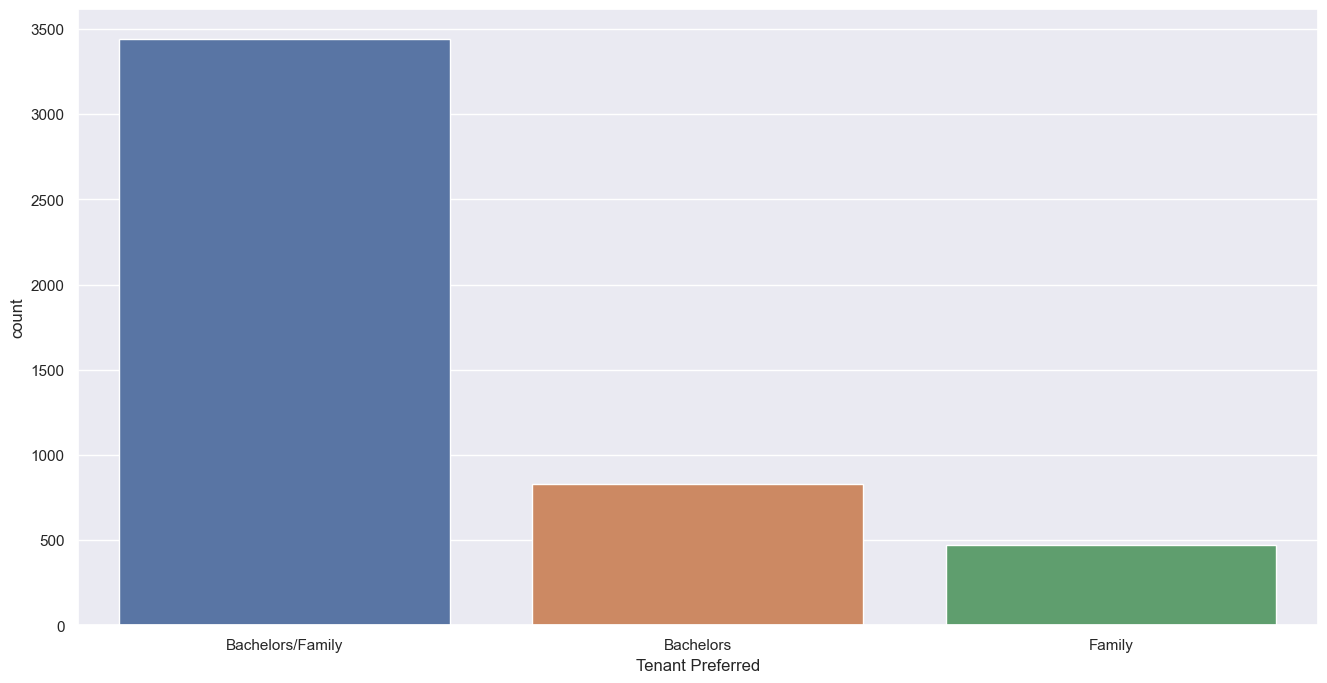

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))
sns.countplot(x='Tenant Preferred',data=df)  

#### From the above plot, we can infer that in the given dataset, majority of the people don't mind Bachelors or Family while a very few people are ready to rent it out to families alone

<AxesSubplot: xlabel='City', ylabel='count'>

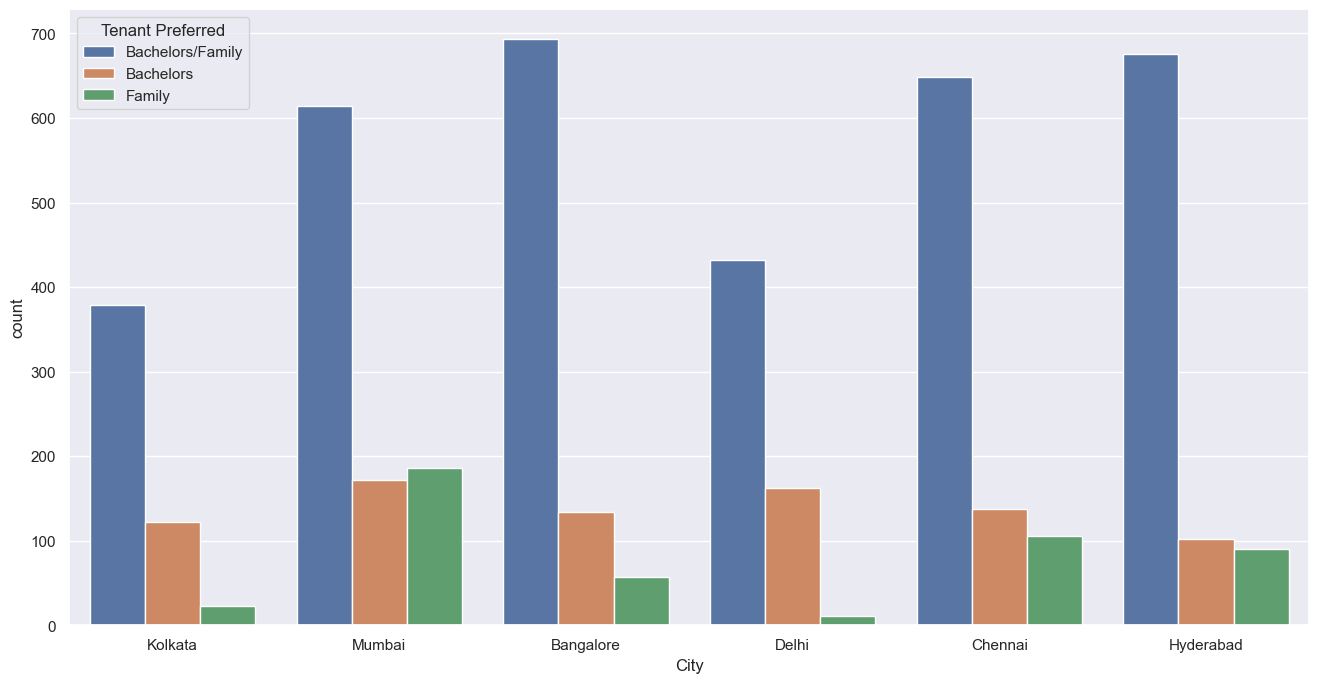

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))
sns.countplot(x='City',hue='Tenant Preferred',data=df)  

#### From the above plot, we can see that the most number of listings in every city caters to both family and bachelors i.e the people renting the place out wouldn't mind either of them. Delhi has very few listings for just family while Bangalore has the highest number of listings with Family/Bachelors tenant preference 



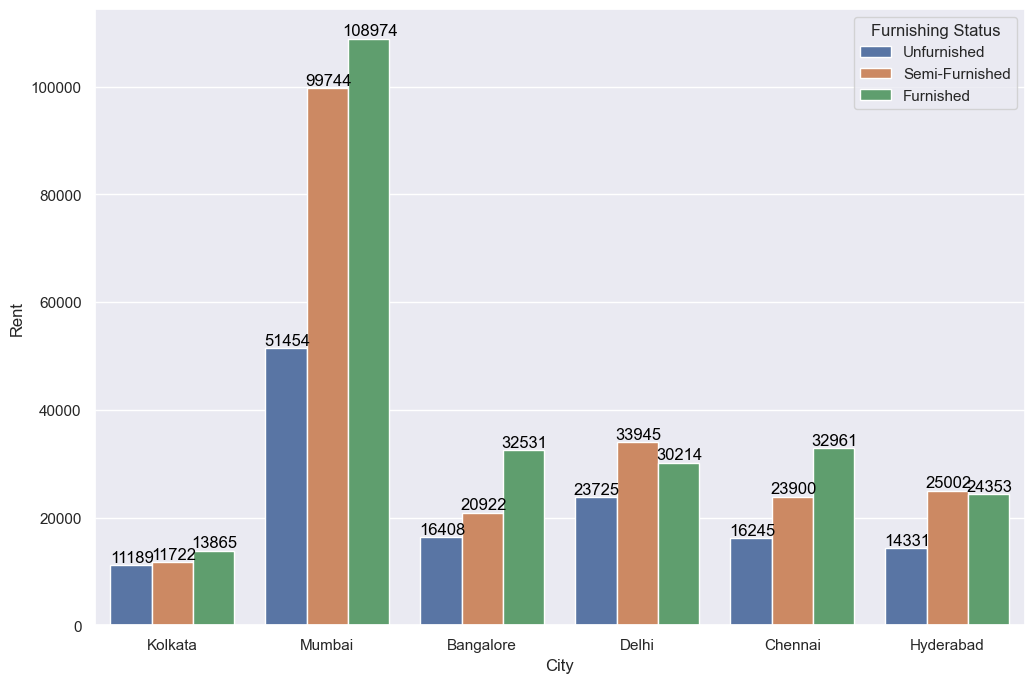

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ann = sns.barplot(x='City',y='Rent', hue='Furnishing Status',data=df,errorbar=None)  
for i in ann.patches:
    ann.annotate(int(i.get_height()), (i.get_x() + 0.14, i.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')


#### Furnished properties attract the highest rent as seen above. Surprisingly, it's not the case for Hyderabad and Delhi barring which, it's the norm in every other metro city. Mumbai has the highest rent in all of India especially the Furnished listings.

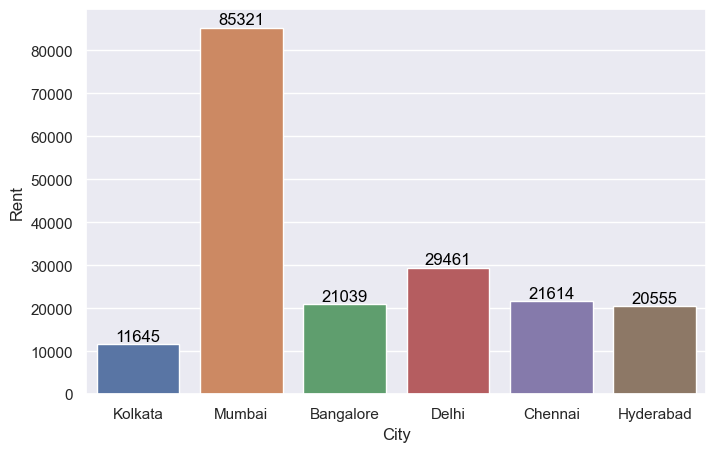

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ann = sns.barplot(x='City',y='Rent',data=df,errorbar=None)  
for i in ann.patches:
    ann.annotate(int(i.get_height()), (i.get_x() + 0.4, i.get_height()), ha = 'center', va = 'bottom', color = 'Black')


#### As expected, Mumbai has the highest rent while Delhi stands second

#### Let's look at the scatter plot locality wise to get a better understanding of the prices in a few localities

In [16]:
px.scatter(df,df.Rent,df['City'],color='Rent',size='Rent',template='plotly_dark')

## **Feature Engineering**

#### Now that we have done our EDA on the dataset, we have an idea as to what the dataset contains, how is the data scattered and how do we go about building a model around it. Let's dive into Feature Engineering.

In [17]:
# Floor Feature - Replacing 'out of' with the corresponding floor level 
# Making the floor column numerical 
df = df.join(df['Floor'].str.split(' out of ', 1, expand=True).rename(columns={0:'Floor Level', 1:'Total Floors'}))
df['Floor Level'] = df.apply(lambda x: 0 if x['Floor Level'] =='Ground' \
                                 else ( -1 if x['Floor Level'] =='Lower Basement' else (x['Total Floors']) ) , axis=1)

df.drop('Floor', axis=1, inplace=True)
df = df.dropna()
df['Floor Level'] = df['Floor Level'].astype(int)
df['Total Floors'] = df['Total Floors'].astype(int)

/var/folders/pq/mgrwzzn5397g_3hn5l6h6myh0000gn/T/ipykernel_92640/4022011216.py:3: FutureWarning:

In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.



In [18]:
df = df[~df['Point of Contact'].str.contains("Contact Builder")]

In [19]:
# Posted On Feature - Converting the date into numerical values which helps in model building

df['month posted'] = df['Posted On'].dt.month
df['day posted'] = df['Posted On'].dt.day
df['day of week posted'] = df['Posted On'].dt.day_of_week
df['quarter poster'] = df['Posted On'].dt.quarter

df.drop('Posted On', axis = 1, inplace= True)

In [20]:
df.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Level,Total Floors,month posted,day posted,day of week posted,quarter poster
0,2,10000,28.637810,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,5,18,2,2
1,2,20000,25.411055,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3,3,5,13,4,2
2,2,17000,27.635366,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3,3,5,16,0,2
3,2,10000,25.411055,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,2,7,4,0,3
4,2,7500,25.998850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2,2,5,9,0,2


## **One Hot Encoding**

In [21]:
# Making the Columns ( City, Furnishing status, Tenant Preferred, POC, Area Type) into Binary Values (0 or 1)

df = df.drop_duplicates()

def ohe(df, column):
    encoded = pd.get_dummies(df[column],drop_first=True)
    df = df.drop(column, axis=1)
    df = df.join(encoded)
    return df



In [22]:
type(df)

pandas.core.frame.DataFrame

In [23]:
df = df.drop('Area Locality', axis= 1)


In [24]:
columns = ['City', 'Area Type', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']

# Passing these columns to the one hot encoding function to convert categorical data into numerical columns

for i in columns:
    df = ohe(df, i)

In [25]:
df.head()

,BHK,Rent,Size,Bathroom,Floor Level,Total Floors,month posted,day posted,day of week posted,quarter poster,...,Hyderabad,Kolkata,Mumbai,Carpet Area,Super Area,Semi-Furnished,Unfurnished,Bachelors/Family,Family,Contact Owner
0,2,10000,28.637810,2,0,2,5,18,2,2,...,0,1,0,0,1,0,1,1,0,1
1,2,20000,25.411055,1,3,3,5,13,4,2,...,0,1,0,0,1,1,0,1,0,1
2,2,17000,27.635366,1,3,3,5,16,0,2,...,0,1,0,0,1,1,0,1,0,1
3,2,10000,25.411055,1,2,2,7,4,0,3,...,0,1,0,0,1,0,1,1,0,1
4,2,7500,25.998850,1,2,2,5,9,0,2,...,0,1,0,1,0,0,1,0,0,1


In [26]:
X = df.drop('Rent', axis= 1)
y = df['Rent']

bc_result = boxcox(y)
y_boxcox = bc_result[0]
lambda_ = bc_result[1]

X_train, X_test, y_train, y_test = train_test_split(X, y_boxcox, test_size= 0.20, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from sklearn.linear_model import Ridge, Lasso

In [28]:
models = {
    'catboost' : CatBoostRegressor(verbose=0),
    'xgboost' : XGBRegressor(),
    'gradient boosting' : GradientBoostingRegressor(),
    'random forest' : RandomForestRegressor(),
    'lasso' : Lasso(),
    'ridge' : Ridge()
    
}

In [29]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

catboost trained
xgboost trained
gradient boosting trained
random forest trained
lasso trained
ridge trained


In [30]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20))
model.add(tf.keras.layers.Dense(60))
model.add(tf.keras.layers.Dense(60))
model.add(tf.keras.layers.Dense(60))
model.add(tf.keras.layers.Dense(1))

model.compile(
    loss = 'mse', 
    optimizer = tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

2022-11-26 16:59:21.448969: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
119/119 [==============================] - 1s 2ms/step - loss: 2.0889 - rmse: 1.4453 - val_loss: 0.0096 - val_rmse: 0.0982
Epoch 2/5
119/119 [==============================] - 0s 1ms/step - loss: 0.0018 - rmse: 0.0419 - val_loss: 5.7425e-04 - val_rmse: 0.0240
Epoch 3/5
119/119 [==============================] - 0s 1ms/step - loss: 7.1865e-04 - rmse: 0.0268 - val_loss: 6.4541e-04 - val_rmse: 0.0254
Epoch 4/5
119/119 [==============================] - 0s 1ms/step - loss: 6.4275e-04 - rmse: 0.0254 - val_loss: 3.3477e-04 - val_rmse: 0.0183
Epoch 5/5
119/119 [==============================] - 0s 1ms/step - loss: 5.0447e-04 - rmse: 0.0225 - val_loss: 3.9579e-04 - val_rmse: 0.0199


In [31]:
RMSE_ann = model.evaluate(X_test, y_test)[1]
RMSE_ann

30/30 [==============================] - 0s 961us/step - loss: 3.9579e-04 - rmse: 0.0199


0.019894571974873543

## **Evaluation**

In [32]:
results = {}
kf = KFold(n_splits= 10)

for name, model in models.items():
    result = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv= kf)))
    results[name] = result
    
results['ANN'] = RMSE_ann

In [33]:
for name, result in results.items():
    print(f"{name} : {round(result, 3)}")

catboost : 0.013
xgboost : 0.014
gradient boosting : 0.014
random forest : 0.014
lasso : 0.03
ridge : 0.014
ANN : 0.02


In [34]:
results_df = pd.DataFrame(results, index=range(0,1)).T.rename(columns={0: 'RMSE'}).sort_values('RMSE', ascending=False)
results_df.T

,lasso,ANN,ridge,xgboost,random forest,gradient boosting,catboost
RMSE,0.029978,0.019895,0.014454,0.014315,0.014192,0.013755,0.013497


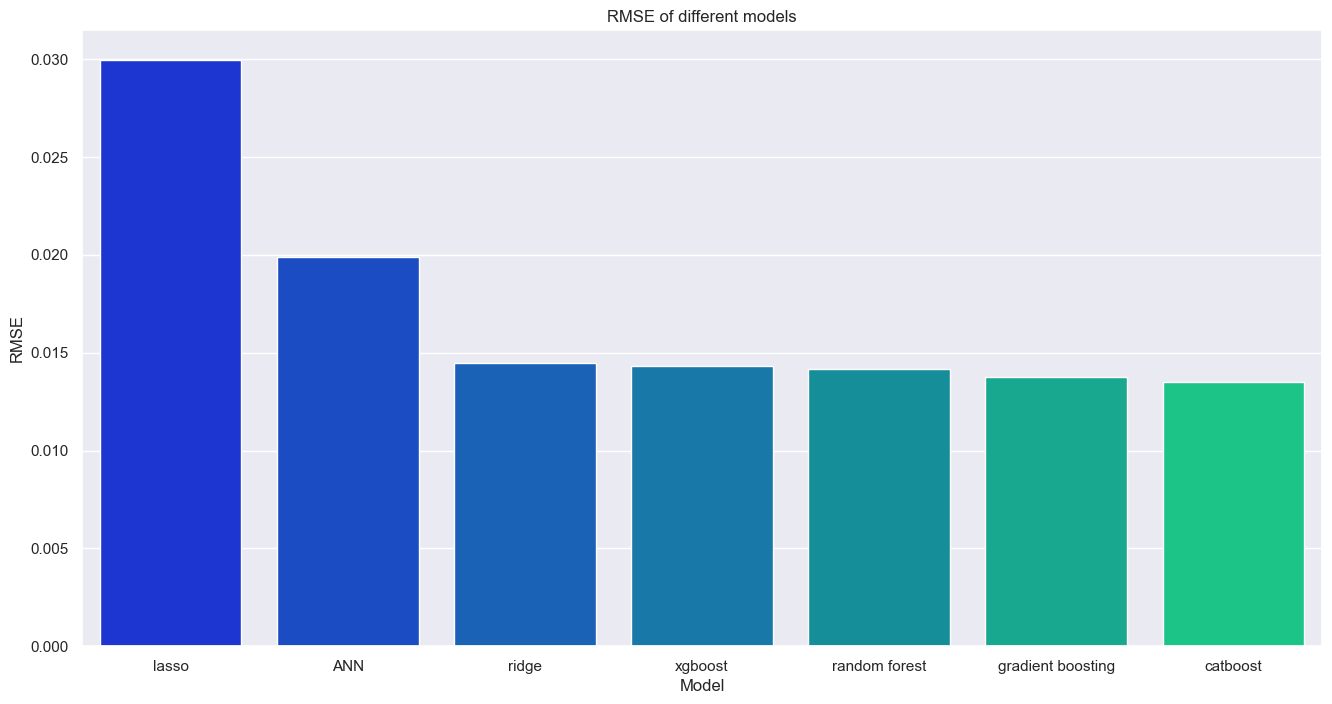

In [35]:
plt.figure(figsize = (16, 8))
sns.barplot(x= results_df.index, y = results_df['RMSE'], palette = 'winter')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of different models');


In [36]:
final_predictions = (
    0.20 * inv_boxcox(models['catboost'].predict(X_test), lam) +
    0.20 * inv_boxcox(models['xgboost'].predict(X_test), lam) +
    0.20 * inv_boxcox(models['random forest'].predict(X_test), lam) + 
    0.20 * inv_boxcox(models['gradient boosting'].predict(X_test), lam)
)

In [37]:
print(f'RMSE: {np.sqrt(mean_squared_error(inv_boxcox(y_test, lam), final_predictions))}')
print(f'R-square: {r2_score(inv_boxcox(y_test, lam), final_predictions)}')

RMSE: 38267.735365666784
R-square: 0.5879450561281132


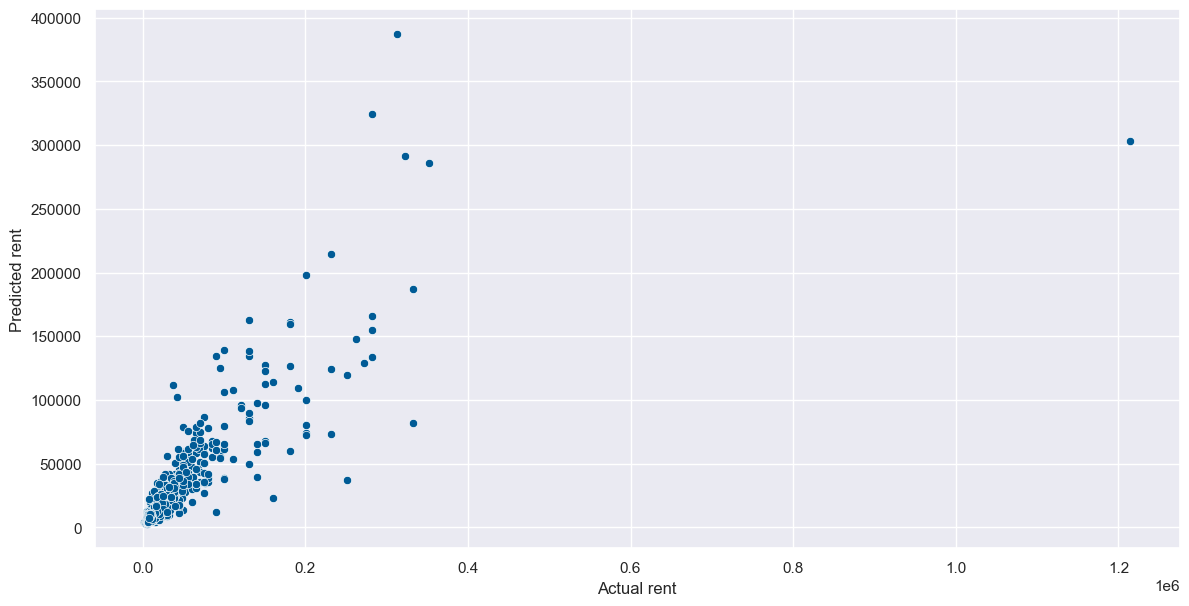

In [38]:
plt.figure(figsize= (14, 7))
sns.scatterplot(x= inv_boxcox(y_test, lam), y= final_predictions, color= '#005b96')
plt.xlabel('Actual rent')
plt.ylabel('Predicted rent')
plt.show()

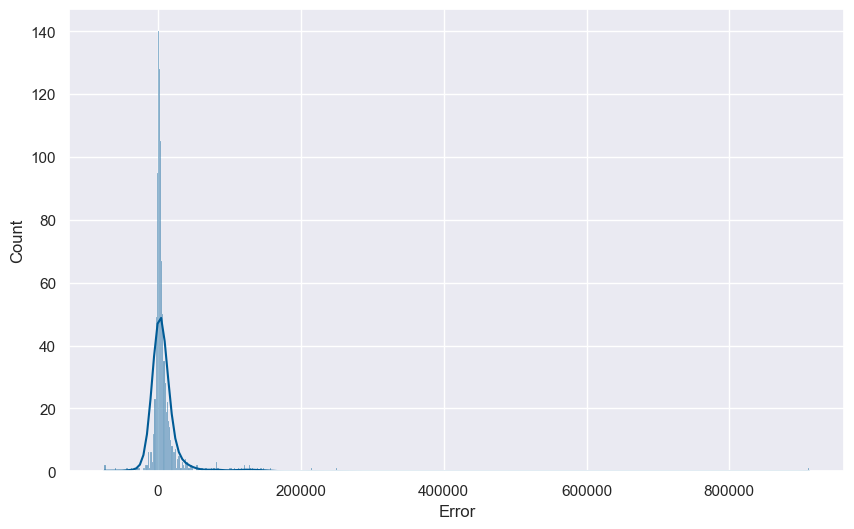

In [39]:
plt.figure(figsize = (10, 6))
sns.histplot(inv_boxcox(y_test, lam) - final_predictions, color = '#005b96', kde= True)
plt.xlabel('Error');

ValueError: Grouper and axis must be same length

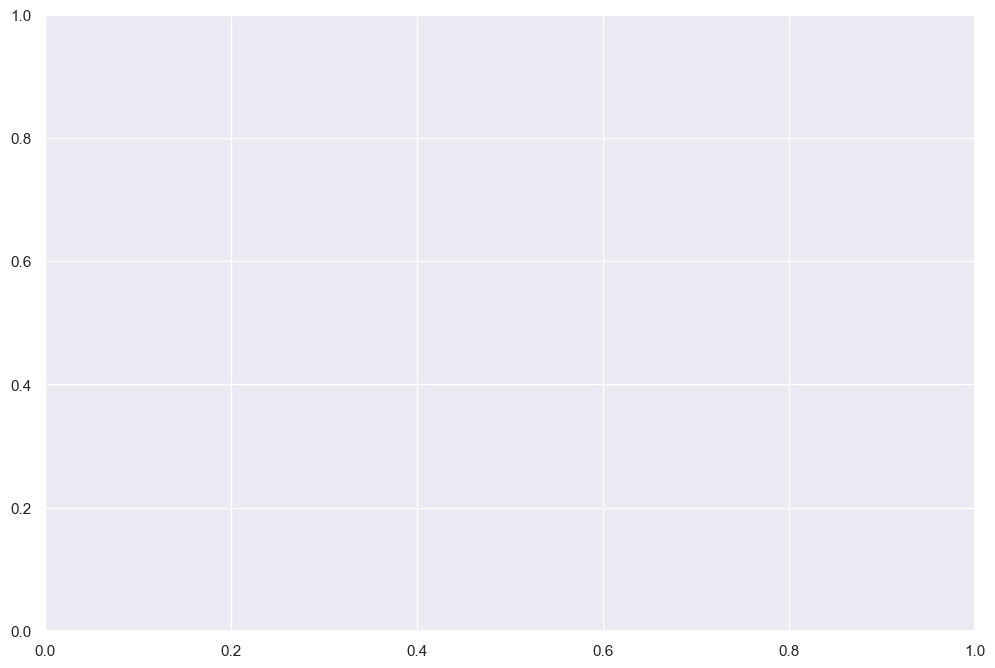

In [380]:
#plt.figure(figsize= (14, 7))
#sns.scatterplot(x= inv_boxcox(y_test, lam), y= final_predictions, color= '#005b96')
#plt.xlabel('Actual rent')
#plt.ylabel('Predicted rent')
#plt.show()

fig, ax = plt.subplots(1, 1, figsize=(12,8))
ann = sns.barplot(x=inv_boxcox(y_test,lam),y=final_predictions,data=df,errorbar=None) 